## Initialize and load data

___


#### Import required libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# set panda to show only 2 decimal points
pd.options.display.float_format = '{:.2f}'.format 

#### Read loan.csv file

In [2]:
# Read the loan.csv file as csv
df =pd.read_csv('loan.csv')


#### Analyse the Data dimension

In [3]:
df.shape

(39717, 111)

#### Load 5 rows of data to have a understanding of Columns and Raws

In [4]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                 0.00   
1                NaN            NaN               NaN                 0.00   
2                NaN            NaN               NaN                 0.00   
3                NaN            NaN               NaN                 0.00   
4                NaN            NaN               NaN                 0.00   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0      0.00             NaN               NaN            NaN   
1      0.00             NaN               NaN            NaN   
2      0.00             NaN               NaN            NaN   
3      0.00             NaN               NaN            NaN   
4      0.00             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

## Start Data cleanup

#### Find and remove columns with most of NaN

In [5]:
print('Number of empty Columns:')
print(df.isnull().all(axis=0).sum())

# drop all coulmns with NaN values
df=df.dropna(axis = 1, how = 'all')

print('Number of empty Columns after drop:')
print(df.isnull().all(axis=0).sum())


Number of empty Columns:
54
Number of empty Columns after drop:
0


We have removed 54 columns that are not having any values

#### Remove columns mths_since_last_delinq since most are 90% NaN values

In [6]:
(df.mths_since_last_delinq.count()/df.shape[0])*100

35.33751290379434

#### Remove columns mths_since_last_record since most are 90% NaN values

In [7]:
(df.mths_since_last_record.count()/df.shape[0])*100

7.0146284966135415

#### Remove columns next_pymnt_d since most are 90% NaN values

In [8]:
(df.next_pymnt_d.count()/df.shape[0])*100

2.8703074250321023

#### Remove the columns and check the shape again

In [9]:
# remove columns
df.drop(columns=['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'], axis =1, inplace=True)
df.shape

(39717, 54)

#### Remove unwated columns

In [10]:
df.drop(columns = ['desc','member_id','url','emp_title','zip_code','tax_liens'], axis =1, inplace=True)
df.shape

(39717, 48)

In [11]:
df.isnull().sum()

id                               0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
purpose                          0
title                           11
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      50
total_acc                        0
initial_list_status 

#### We have removed All the NaN value columns
____

In [12]:
# Check duplicate rows
print(df.duplicated(subset=None, keep='first').count())
repeated=df[df.duplicated(['id'])]
repeated

39717


Empty DataFrame
Columns: [id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, purpose, title, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies]
Index: []

[0 rows x 48 columns]

No duplicate rows

### Fix the missing values
____

#### Cleanup term column

In [13]:
# term should be numaric remove trailing 'months'
df.term=df.term.str.replace(" months","")
df.term=df.term.astype('int32')
df.term.head(5)

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int32

#### Cleanup int_rate

In [14]:
# remove traling %
df.int_rate=df.int_rate.str.rstrip("%")
df.int_rate=df.int_rate.astype('float')
df.int_rate.head(5)

0   10.65
1   15.27
2   15.96
3   13.49
4   12.69
Name: int_rate, dtype: float64

#### Cleanup emp_length column 

In [15]:
df.emp_length.head(5)

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [16]:
# Clean emp_length, extract only int value and fill missing values with 0
df.emp_length.fillna('0',inplace=True)
df['emp_length']=df.emp_length.str.extract('(\d+)')
df.head(5)    

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000          4975.00    36     10.65   
1  1077430       2500         2500          2500.00    60     15.27   
2  1077175       2400         2400          2400.00    36     15.96   
3  1076863      10000        10000         10000.00    36     13.49   
4  1075358       3000         3000          3000.00    60     12.69   

   installment grade sub_grade emp_length  ... last_pymnt_d  last_pymnt_amnt  \
0       162.87     B        B2         10  ...       Jan-15           171.62   
1        59.83     C        C4          1  ...       Apr-13           119.66   
2        84.33     C        C5         10  ...       Jun-14           649.91   
3       339.31     C        C1         10  ...       Jan-15           357.48   
4        67.79     B        B5          1  ...       May-16            67.79   

  last_credit_pull_d collections_12_mths_ex_med policy_code application_type  \
0             May-16                       0.00           1       INDIVIDUAL   
1             Sep-13                       0.00           1       INDIVIDUAL   
2             May-16                       0.00           1       INDIVIDUAL   
3             Apr-16                       0.00           1       INDIVIDUAL   
4             May-16                       0.00           1       INDIVIDUAL   

  acc_now_delinq chargeoff_within_12_mths delinq_amnt  pub_rec_bankruptcies  
0              0                     0.00           0                  0.00  
1              0                     0.00           0                  0.00  
2              0                     0.00           0                  0.00  
3              0                     0.00           0                  0.00  
4              0                     0.00           0                  0.00  

[5 rows x 48 columns]

#### Cleanup title column

In [17]:
df.title=df.title.fillna('Missing')
df.title.head(5)

0                Computer
1                    bike
2    real estate business
3                personel
4                Personal
Name: title, dtype: object

#### Cleanup revol_util column

In [18]:
# remove trailing % from revol_util
df['revol_util'] = df['revol_util'].str.rstrip('%')
df.revol_util.head(5)

0    83.70
1     9.40
2    98.50
3       21
4    53.90
Name: revol_util, dtype: object

#### Cleanup pub_rec_bankruptcies  column

In [19]:
df.pub_rec_bankruptcies= df.pub_rec_bankruptcies.fillna(df.pub_rec_bankruptcies.median())
df.pub_rec_bankruptcies.head(5)

0   0.00
1   0.00
2   0.00
3   0.00
4   0.00
Name: pub_rec_bankruptcies, dtype: float64

#### Cleanup last_credit_pull_d column

In [20]:
df1=df[df.last_credit_pull_d.notnull()]
df.last_credit_pull_d=df.last_credit_pull_d.fillna(df1.median())

#### Convert data type to numeric for interger type columns

In [21]:
clms = ['funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt','loan_amnt','funded_amnt','int_rate']
df[clms] = df[clms].apply(pd.to_numeric)

#### Create month and year columns for further analysis


In [22]:
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df['year']=df['issue_d'].dt.year
df['month']=df['issue_d'].dt.month

df.head(5)

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000          4975.00    36     10.65   
1  1077430       2500         2500          2500.00    60     15.27   
2  1077175       2400         2400          2400.00    36     15.96   
3  1076863      10000        10000         10000.00    36     13.49   
4  1075358       3000         3000          3000.00    60     12.69   

   installment grade sub_grade  emp_length  ... last_credit_pull_d  \
0       162.87     B        B2          10  ...             May-16   
1        59.83     C        C4           1  ...             Sep-13   
2        84.33     C        C5          10  ...             May-16   
3       339.31     C        C1          10  ...             Apr-16   
4        67.79     B        B5           1  ...             May-16   

   collections_12_mths_ex_med policy_code application_type acc_now_delinq  \
0                        0.00           1       INDIVIDUAL              0   
1                        0.00           1       INDIVIDUAL              0   
2                        0.00           1       INDIVIDUAL              0   
3                        0.00           1       INDIVIDUAL              0   
4                        0.00           1       INDIVIDUAL              0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies  year  month  
0                     0.00           0                 0.00  2011     12  
1                     0.00           0                 0.00  2011     12  
2                     0.00           0                 0.00  2011     12  
3                     0.00           0                 0.00  2011     12  
4                     0.00           0                 0.00  2011     12  

[5 rows x 50 columns]

## Univariate Data Analysis
___

#### Analyse column loan_amn

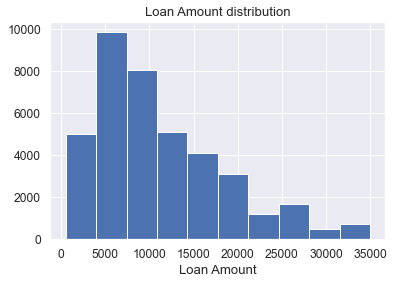

In [59]:
plt.hist(df.loan_amnt)
plt.title("Loan Amount distribution")
plt.xlabel("Loan Amount")
plt.show()

#### Analyse funded_amnt

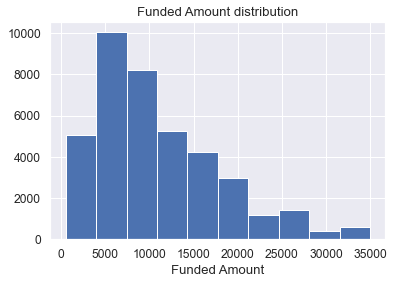

In [60]:
plt.hist(df.funded_amnt)
plt.title("Funded Amount distribution")
plt.xlabel("Funded Amount")
plt.show()

#### Analyse column funded_amnt_inv

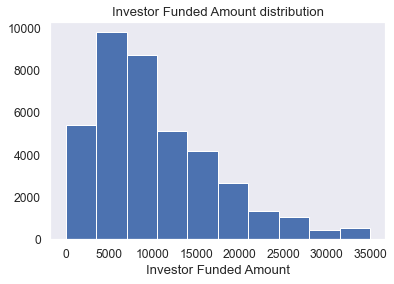

In [69]:
plt.hist(df.funded_amnt_inv)
plt.title("Investor Funded Amount distribution")
plt.xlabel("Investor Funded Amount")
plt.show()

##### Assumption: As we can see Loan amount, Funded Amount, Invetor Funded Amount have similar distridution. Further analysis will be done on column funded_amnt_inv, because this is the amount invested by the investor

#### Create a Box Plot find the outlire in the funded_amnt_inv

<AxesSubplot:xlabel='funded_amnt_inv'>

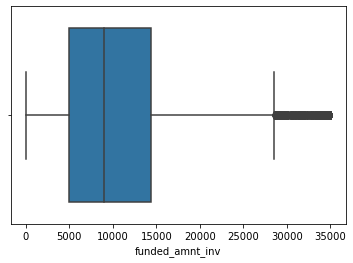

In [26]:
sns.boxplot(df.funded_amnt_inv)

Investors has invested mostly on the loans that are in range between amt 5000 to 15000 as per boxplot, there are outliers as well where investors has invested in the loans amt more then 25000

#### Analyse term

In [28]:
# Check what is the frequency of loan term
df.term.value_counts()

36    29096
60    10621
Name: term, dtype: int64

we can see that most os the loans are for 36 years

<AxesSubplot:xlabel='int_rate'>

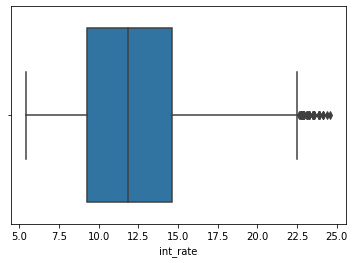

In [29]:
sns.boxplot(df.int_rate)


 Box plot shows that there are outliers with more then 22.5% interest rate,median is at 12% interest rate

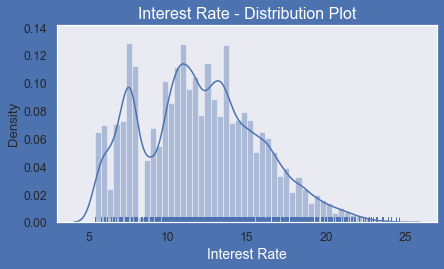

In [67]:
plt.figure(figsize=(15,8),facecolor='b')
plt.subplot(2, 2, 1)
p = sns.distplot(df['int_rate'],rug = True)
p.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
p.set_xlabel('Interest Rate',fontsize=14,color='w')
plt.show()

Distribution shows most common interest rate are in range of 10 to 15 %


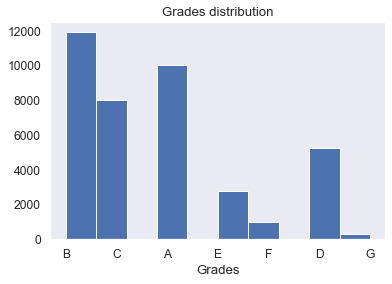

In [71]:
plt.hist(df.grade,bins=10)
plt.title("Grades distribution")
plt.xlabel("Grades")
plt.show()

Histogram shows 12000 loans are graded as B and 10000 are graded as A

In [32]:
df.annual_inc.describe()


count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

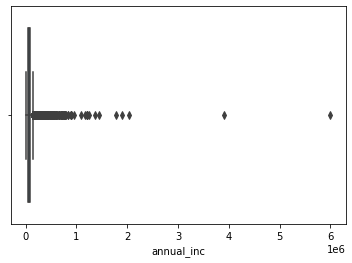

In [33]:
# see the outliers in the annual_inc
sns.boxplot(df.annual_inc)

<AxesSubplot:xlabel='annual_inc'>

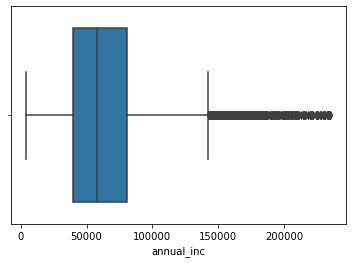

In [34]:
# remove outliers from the annual_inc
df = df[df["annual_inc"] < df["annual_inc"].quantile(0.99)]
# plot again
sns.boxplot(df.annual_inc)

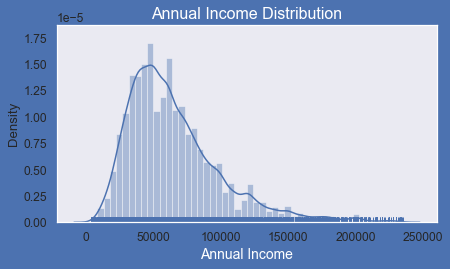

In [72]:
plt.figure(figsize=(15,8),facecolor='b')
plt.subplot(2, 2, 1)
p = sns.distplot(df['annual_inc'],rug = True)
p.set_title('Annual Income Distribution',fontsize=16,color='w')
p.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

We can see most of the cutomers applying for loan has annual income in range 40000 to 90000

<AxesSubplot:xlabel='emp_length'>

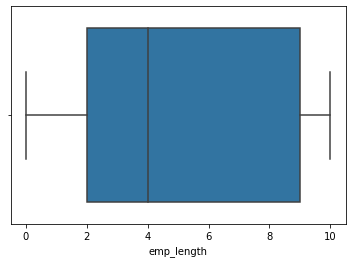

In [36]:
sns.boxplot(df.emp_length)

Boxplot shows that customers having employeement length more then 10 years and less then 2 years are outliers

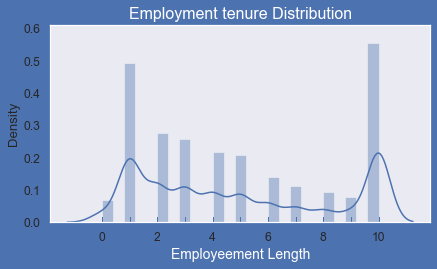

In [74]:
plt.figure(figsize=(15,8),facecolor='b')
plt.subplot(2, 2, 1)
p = sns.distplot(df['emp_length'],rug = True)
p.set_title('Employment tenure Distribution',fontsize=16,color='w')
p.set_xlabel('Employeement Length',fontsize=14,color='w')
plt.show()


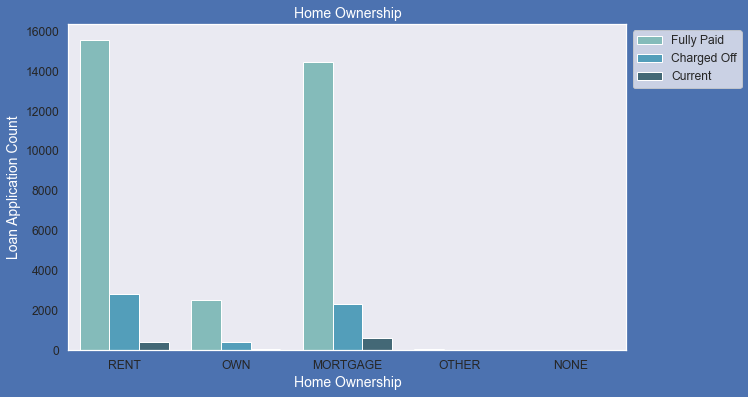

In [82]:
plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="home_ownership",data=df,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

Observation:
- We see that people who are living on rent or have mortgage are most likely to apply for loan

- Charged off is also high from this category

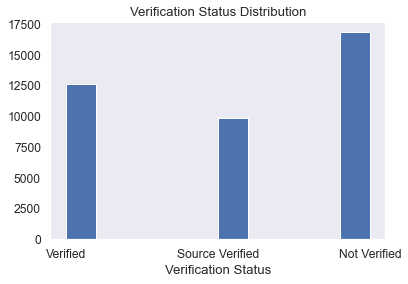

In [77]:
plt.hist(df.verification_status)
plt.title("Verification Status Distribution")
plt.xlabel("Verification Status")
plt.show()

we see that very less loan applications are source verified

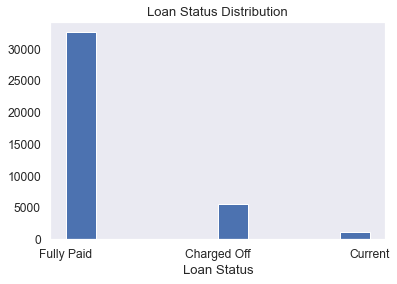

In [78]:
plt.hist(df.loan_status)
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.show()

We see that most of the loans are fully paid, 5000 are charged off, few are current loans 

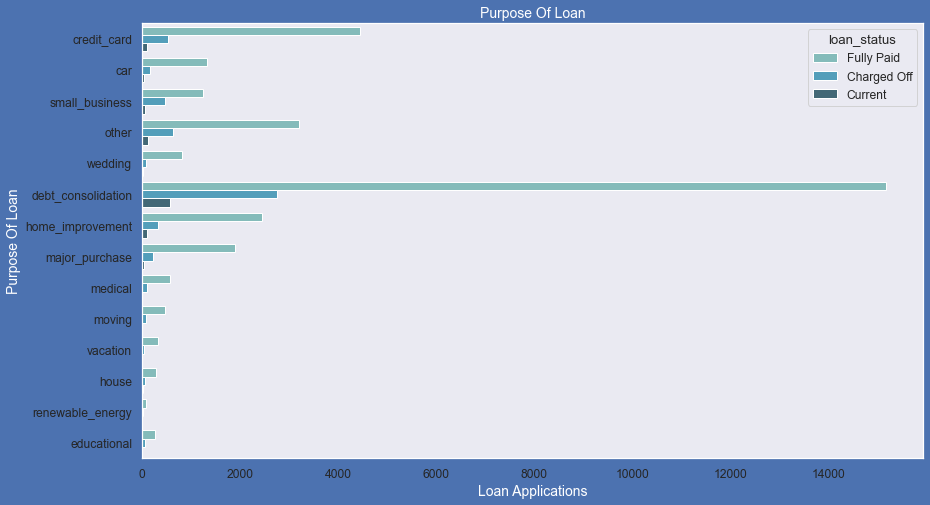

In [81]:
plt.figure(figsize=(14,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=df,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Applications',fontsize=14,color = 'w')      
plt.show()

Observation:
- We can see that most of the loans are taken for credit card and debt_consolidation.
- Number of chraged off count also high for these loans.

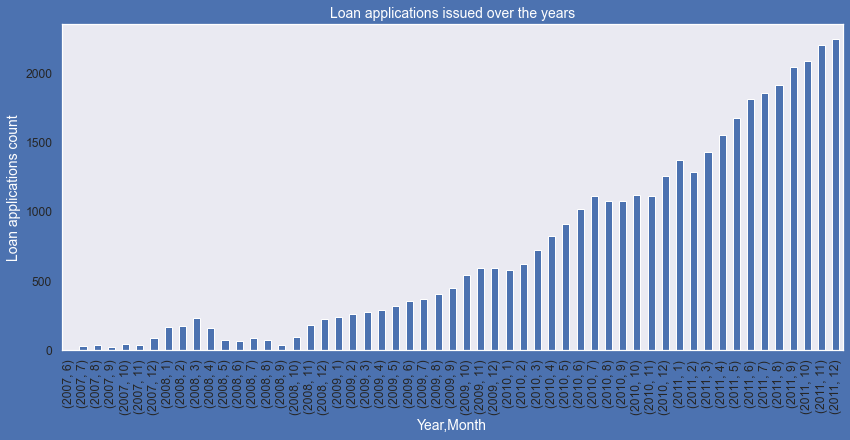

In [85]:
plt.figure(figsize=(14,6),facecolor='b')
df.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='w')
plt.xlabel('Year,Month',fontsize=14,color = 'w')      
plt.title("Loan applications issued over the years",fontsize=14,color='w')
plt.show()

 Observation:
- Count of loan application is increasing every year.
- Increase in number of loan applications are adding more to number of charged off applications.
- Number of loans issued in 2008( May-October) got dipped, may be due to Recession.

### BiVariate data analysis
____

#### Understanding the different variable corrilations

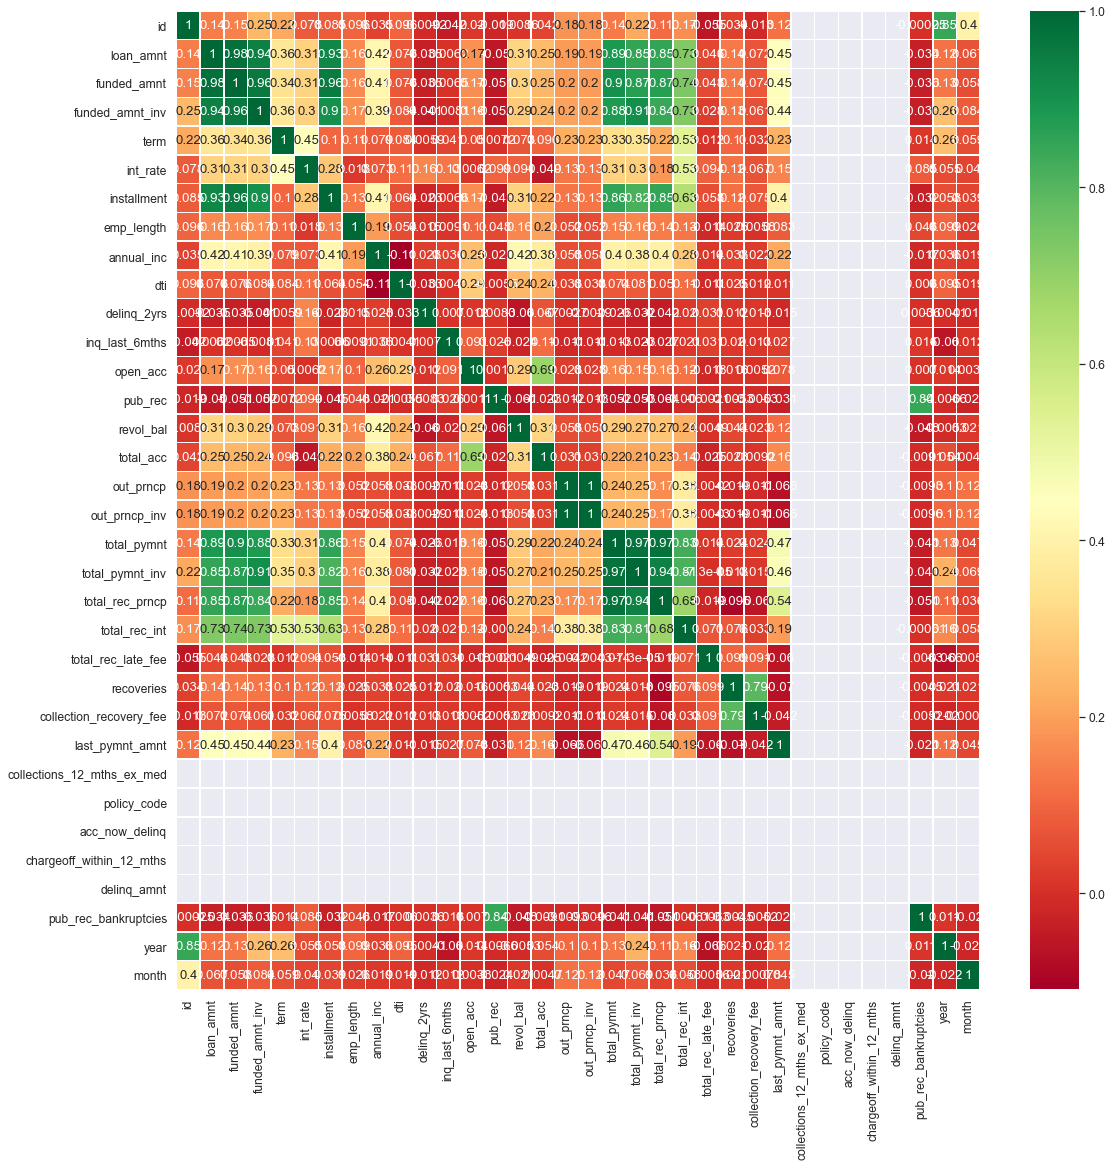

In [49]:
# Create heatmap to see the corrilation between all the variables
loan_df_corr=df.corr()
plt.figure(figsize=(18,18))
sns.set(font_scale=1.1)
sns.heatmap(loan_df_corr,annot=True,cmap='RdYlGn',linewidths=.5)
plt.show()

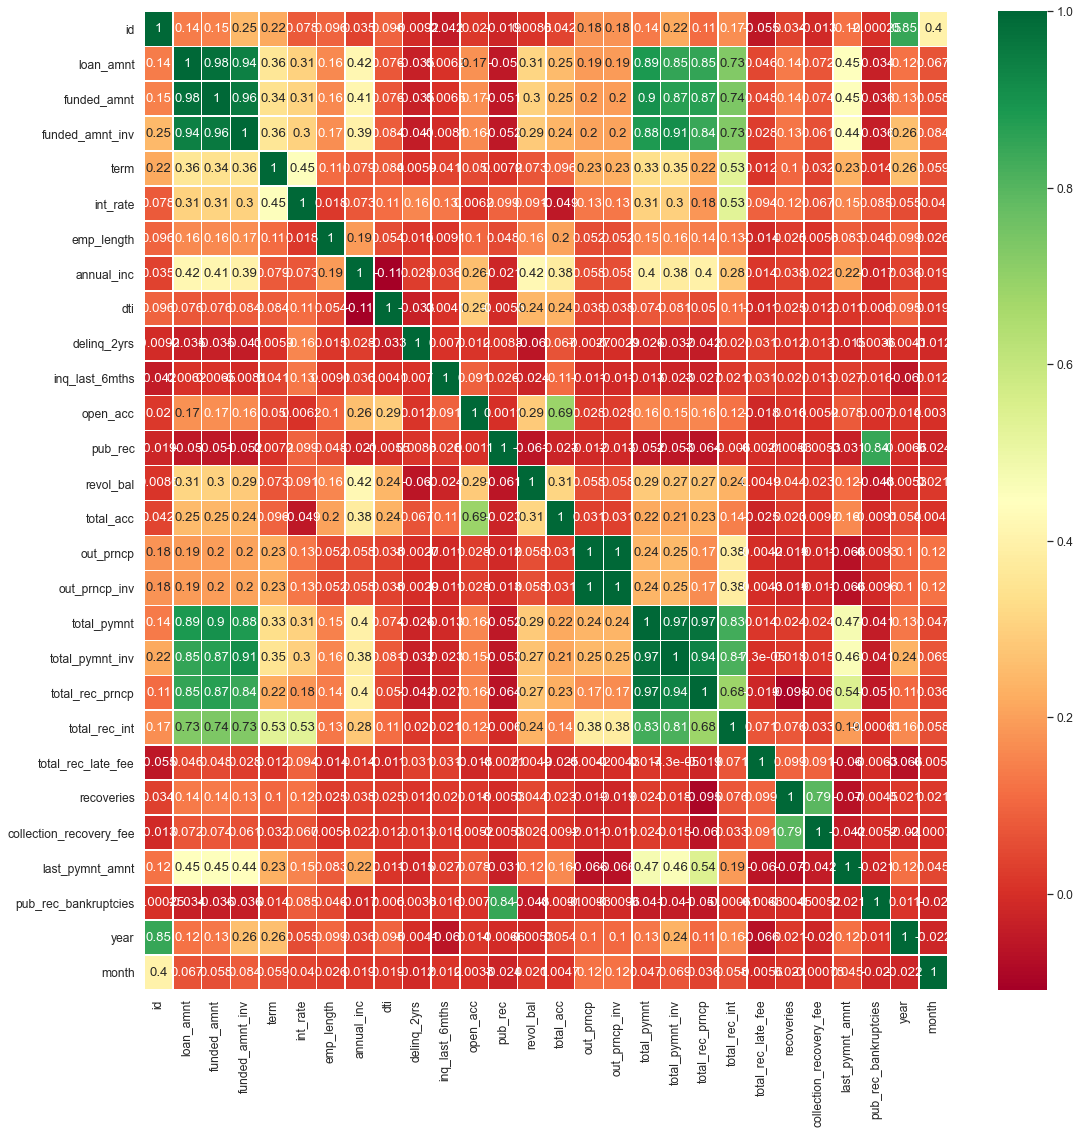

In [54]:
#  remove the 0 value columns and plot the heatmap again to see the correlation
df.drop(columns=['collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','application_type','policy_code','initial_list_status','installment','pymnt_plan'],axis =1, inplace=True)
loan_df_corr=df.corr()
plt.figure(figsize=(18,18))
sns.set(font_scale=1.1)
sns.heatmap(loan_df_corr,annot=True,cmap='RdYlGn',linewidths=.5)
plt.show()

Obeservations:
- We can see that loan amount,funded investor amoun and funding amount are high correlated.
- Debt to income ratio (DTI) is negatively correlated, that is if income increases DTI will decrease.


#### Create new columns for  further analysis


In [57]:
# categorise loan amounts,annual incomes,intrest rates,dti into buckets.

df['loan_amnt_cats'] = pd.cut(df['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

df['annual_inc_cats'] = pd.cut(df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

df['int_rate_cats'] = pd.cut(df['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

df['dti_cats'] = pd.cut(df['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

#### Bivariate analysis


#### Bivariate Analysis : 
In this part of analysis, lets try to analyze the loan status against some important columns which might have played important role in charged off of loans.

We will follow the below steps to calculate the proportion of charged off loans:
 - Group loans by different variables and loan status, get the count,use .unstack() to return a DataFrame.
 - Since we’re going to use this for further analysis, it will be helpful to use .reset_index() to clean up the index.
 - Assign the new DataFrame to a variable.
 - Create a simple derived column that sums charged off,current and fully paid loans for each category.
 - Divide the number of charged off loans by the total number of loans to get the proportion of charged off loans.
 - Store this as another derived column.
 - Finally, output the whole table, sorted by proportion of charged off in each category issued loans.

In [91]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

annual_inc_range_vs_loan = df.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
annual_inc_range_vs_loan['Total'] = annual_inc_range_vs_loan['Charged Off'] + annual_inc_range_vs_loan['Current'] + annual_inc_range_vs_loan['Fully Paid'] 
annual_inc_range_vs_loan['Chargedoff_Proportion'] = annual_inc_range_vs_loan['Charged Off'] / annual_inc_range_vs_loan['Total']
annual_inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)



loan_status annual_inc_cats  Charged Off  Current  Fully Paid  Total  \
0                   0-20000          237        9         943   1189   
1               20000-40000         1514      170        7004   8688   
2               40000-60000         1729      345        9534  11608   
3               60000-80000         1024      240        6597   7861   
4                   80000 +         1080      362        8531   9973   

loan_status  Chargedoff_Proportion  
0                             0.20  
1                             0.17  
2                             0.15  
3                             0.13  
4                             0.11

Observations:
- Income range 80000+  has less chances of charged off.
- Income range 0-20000 has high chances of charged off.
- Notice that with increase in annual income charged off proportion got decreased.

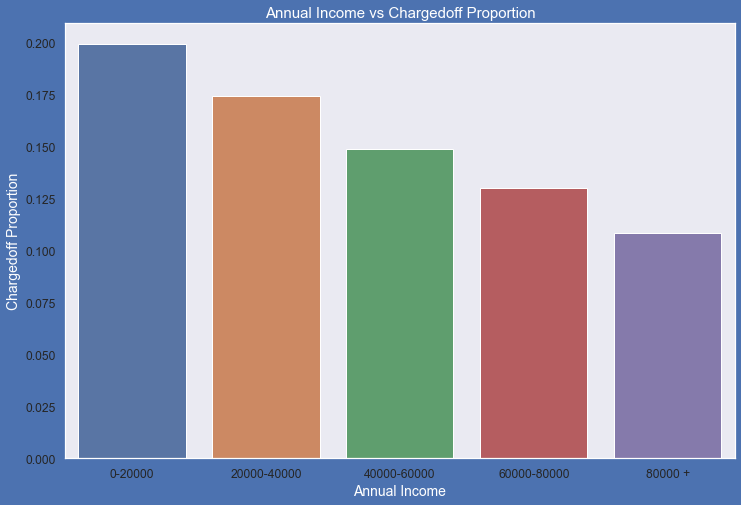

In [93]:
# Plot the above calculation

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=annual_inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

In [94]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purposeOfLoan_vs_loan_status = df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purposeOfLoan_vs_loan_status['Total'] = purposeOfLoan_vs_loan_status['Charged Off'] + purposeOfLoan_vs_loan_status['Current'] + purposeOfLoan_vs_loan_status['Fully Paid'] 
purposeOfLoan_vs_loan_status['Chargedoff_Proportion'] = purposeOfLoan_vs_loan_status['Charged Off'] / purposeOfLoan_vs_loan_status['Total']
purposeOfLoan_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)


loan_status             purpose  Charged Off  Current  Fully Paid    Total  \
11               small_business       472.00    74.00     1251.00  1797.00   
10             renewable_energy        19.00     1.00       81.00   101.00   
3                   educational        55.00     0.00      268.00   323.00   
9                         other       629.00   126.00     3203.00  3958.00   
8                        moving        91.00     7.00      479.00   577.00   
5                         house        58.00    14.00      299.00   371.00   
7                       medical       106.00    12.00      568.00   686.00   
2            debt_consolidation      2752.00   580.00    15165.00 18497.00   
12                     vacation        53.00     6.00      322.00   381.00   
4              home_improvement       338.00    97.00     2459.00  2894.00   
1                   credit_card       537.00   102.00     4450.00  5089.00   
0                           car       160.00    50.00     1332.00  1542.00   
6                major_purchase       220.00    37.00     1909.00  2166.00   
13                      wedding        94.00    20.00      823.00   937.00   

loan_status  Chargedoff_Proportion  
11                            0.26  
10                            0.19  
3                             0.17  
9                             0.16  
8                             0.16  
5                             0.16  
7                             0.15  
2                             0.15  
12                            0.14  
4                             0.12  
1                             0.11  
0                             0.10  
6                             0.10  
13                            0.10

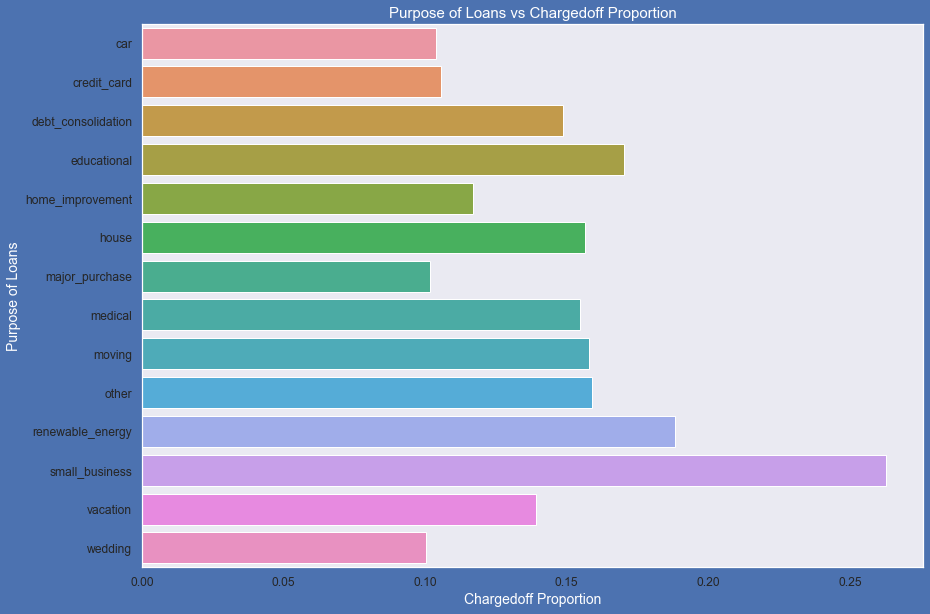

In [99]:
# Plot the above calculation
fig, ax1 = plt.subplots(figsize=(14, 10),facecolor='b')
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purposeOfLoan_vs_loan_status)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

 Observations:
- small Business applicants have high chances of getting charged off.
- car where chanrged off proportion is better as compare to other categories.

In [102]:
# Bivariate Analysis on grade against Chargedoff_Proportion

grade_vs_loan_status = df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan_status['Total'] = grade_vs_loan_status['Charged Off'] + grade_vs_loan_status['Current'] + grade_vs_loan_status['Fully Paid'] 
grade_vs_loan_status['Chargedoff_Proportion'] = grade_vs_loan_status['Charged Off'] / grade_vs_loan_status['Total']
grade_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)



loan_status grade  Charged Off  Current  Fully Paid  Total  \
6               G           99       17         190    306   
5               F          312       71         642   1025   
4               E          704      176        1906   2786   
3               D         1112      216        3916   5244   
2               C         1342      262        6411   8015   
1               B         1414      344       10167  11925   
0               A          601       40        9377  10018   

loan_status  Chargedoff_Proportion  
6                             0.32  
5                             0.30  
4                             0.25  
3                             0.21  
2                             0.17  
1                             0.12  
0                             0.06

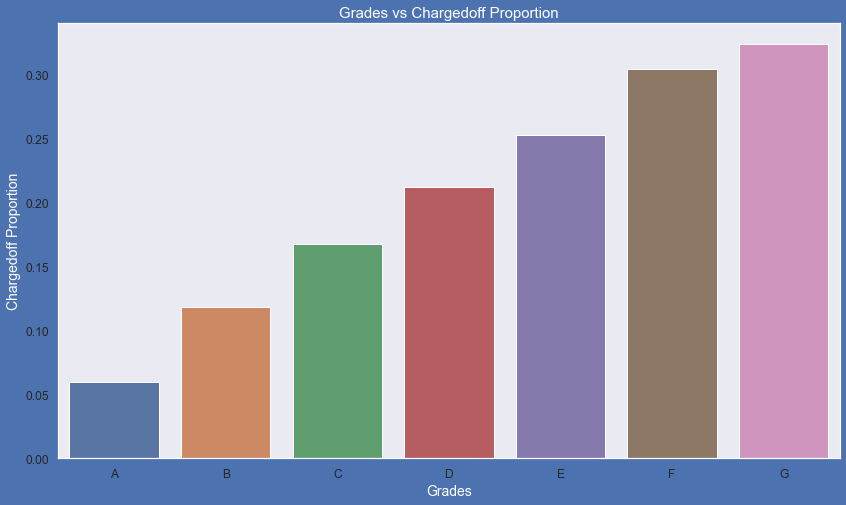

In [104]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan_status)
ax1.set_xlabel('Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color ='w')
plt.show()



Observations:
- Grade "A" has very less chances of charged off.
- Grade "F" and "G" have very high chances of charged off.
- Chances of charged of is increasing with grade moving from "A" towards "G"

In [106]:
# Understanding grades better
# Bivariate Analysis on sub grade against Chargedoff_Proportion

grade_vs_loan_status = df.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan_status['Total'] = grade_vs_loan_status['Charged Off'] + grade_vs_loan_status['Current'] + grade_vs_loan_status['Fully Paid'] 
grade_vs_loan_status['Chargedoff_Proportion'] = grade_vs_loan_status['Charged Off'] / grade_vs_loan_status['Total']
grade_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)


loan_status sub_grade  Charged Off  Current  Fully Paid   Total  \
29                 F5        53.00     4.00       55.00  112.00   
32                 G3        19.00     3.00       25.00   47.00   
31                 G2        27.00     1.00       47.00   75.00   
34                 G5        10.00     1.00       18.00   29.00   
28                 F4        52.00    17.00       96.00  165.00   
30                 G1        31.00    10.00       61.00  102.00   
23                 E4       126.00    28.00      293.00  447.00   
26                 F2        69.00    16.00      162.00  247.00   
27                 F3        50.00    11.00      118.00  179.00   
25                 F1        88.00    23.00      211.00  322.00   
24                 E5       106.00    29.00      264.00  399.00   
20                 E1       195.00    40.00      517.00  752.00   
21                 E2       160.00    42.00      444.00  646.00   
19                 D5       209.00    36.00      617.00  862.00   
33                 G4        12.00     2.00       39.00   53.00   
18                 D4       214.00    63.00      693.00  970.00   
17                 D3       253.00    56.00      850.00 1159.00   
22                 E3       117.00    37.00      388.00  542.00   
16                 D2       269.00    61.00     1000.00 1330.00   
15                 D1       167.00     0.00      756.00  923.00   
12                 C3       269.00    41.00     1200.00 1510.00   
14                 C5       208.00    32.00      931.00 1171.00   
13                 C4       211.00    30.00      988.00 1229.00   
11                 C2       321.00    78.00     1593.00 1992.00   
10                 C1       333.00    81.00     1699.00 2113.00   
9                  B5       356.00    89.00     2244.00 2689.00   
8                  B4       328.00    74.00     2097.00 2499.00   
7                  B3       335.00    92.00     2457.00 2884.00   
6                  B2       225.00    56.00     1753.00 2034.00   
5                  B1       170.00    33.00     1616.00 1819.00   
4                  A5       216.00    27.00     2478.00 2721.00   
3                  A4       178.00    13.00     2676.00 2867.00   
2                  A3       103.00     0.00     1696.00 1799.00   
1                  A2        74.00     0.00     1425.00 1499.00   
0                  A1        30.00     0.00     1102.00 1132.00   

loan_status  Chargedoff_Proportion  
29                            0.47  
32                            0.40  
31                            0.36  
34                            0.34  
28                            0.32  
30                            0.30  
23                            0.28  
26                            0.28  
27                            0.28  
25                            0.27  
24                            0.27  
20                            0.26  
21                            0.25  
19                            0.24  
33                            0.23  
18                            0.22  
17                            0.22  
22                            0.22  
16                            0.20  
15                            0.18  
12                            0.18  
14                            0.18  
13                            0.17  
11                            0.16  
10                            0.16  
9                             0.13  
8                             0.13  
7                             0.12  
6                             0.11  
5                             0.09  
4                             0.08  
3                             0.06  
2                             0.06  
1                             0.05  
0                             0.03

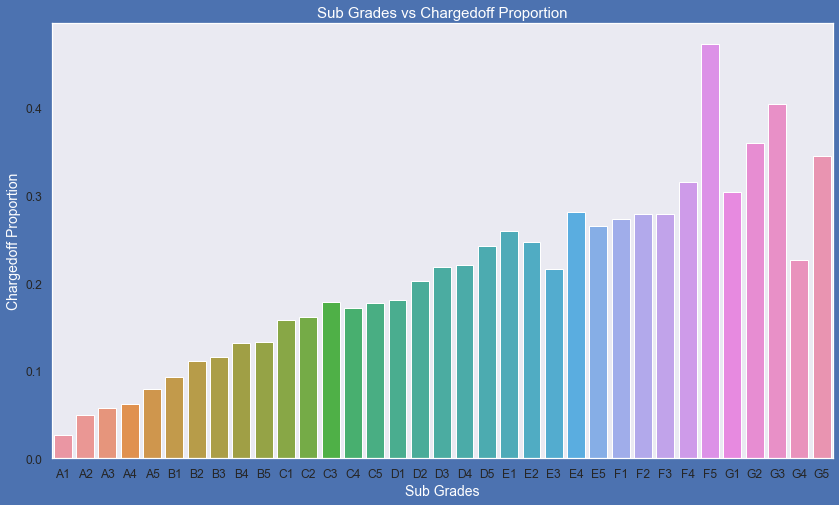

In [107]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=grade_vs_loan_status)
ax1.set_xlabel('Sub Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()



Observations:
- sub Grades of "A" has very less chances of charged off.
- sub Grades of "F" and "G" have very high chances of charged off.
- proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

In [108]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

interest_rate_vs_loan_status = df.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_rate_vs_loan_status['Total'] = interest_rate_vs_loan_status['Charged Off'] + interest_rate_vs_loan_status['Current'] + interest_rate_vs_loan_status['Fully Paid'] 
interest_rate_vs_loan_status['Chargedoff_Proportion'] = interest_rate_vs_loan_status['Charged Off'] / interest_rate_vs_loan_status['Total']
interest_rate_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)


loan_status int_rate_cats  Charged Off  Current  Fully Paid  Total  \
3                    16 +         1250      351        3317   4918   
2                 12.5-16         1995      329        9354  11678   
1                   10-13         1224      269        8083   9576   
0                    0-10          825       77       11403  12305   

loan_status  Chargedoff_Proportion  
3                             0.25  
2                             0.17  
1                             0.13  
0                             0.07

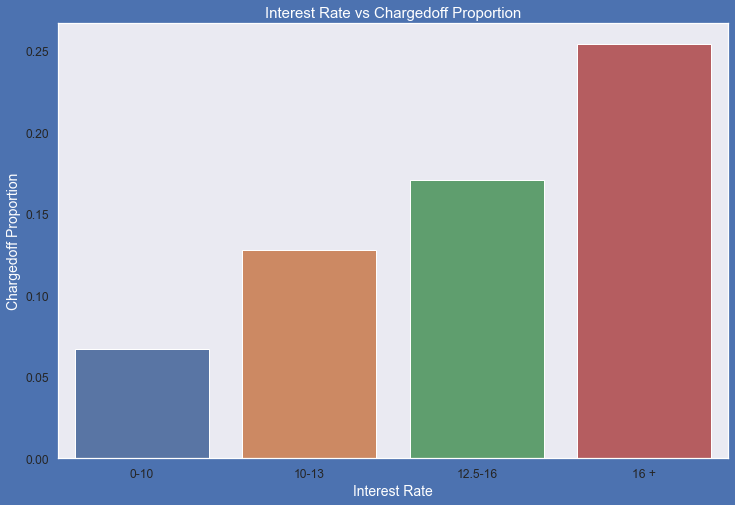

In [109]:
# Lets draw some bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=interest_rate_vs_loan_status)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()



Observations:
- interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
- interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
- Charged off proportion is increasing with higher intrest rates.

In [110]:
# Bivariate Analysis on employment length against Chargedoff_Proportion

employment_length_vs_loan_status = df.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
employment_length_vs_loan_status['Total'] = employment_length_vs_loan_status['Charged Off'] + employment_length_vs_loan_status['Current'] + employment_length_vs_loan_status['Fully Paid'] 
employment_length_vs_loan_status['Chargedoff_Proportion'] = employment_length_vs_loan_status['Charged Off'] / employment_length_vs_loan_status['Total']
employment_length_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)



loan_status  emp_length  Charged Off  Current  Fully Paid  Total  \
0                     0          227       42         801   1070   
10                   10         1316      386        7038   8740   
7                     7          262       62        1435   1759   
1                     1         1090      143        6533   7766   
5                     5          456       87        2712   3255   
8                     8          203       43        1216   1462   
6                     6          305       58        1846   2209   
3                     3          551       82        3426   4059   
4                     4          456       94        2860   3410   
2                     2          561       97        3684   4342   
9                     9          157       32        1058   1247   

loan_status  Chargedoff_Proportion  
0                             0.21  
10                            0.15  
7                             0.15  
1                             0.14  
5                             0.14  
8                             0.14  
6                             0.14  
3                             0.14  
4                             0.13  
2                             0.13  
9                             0.13

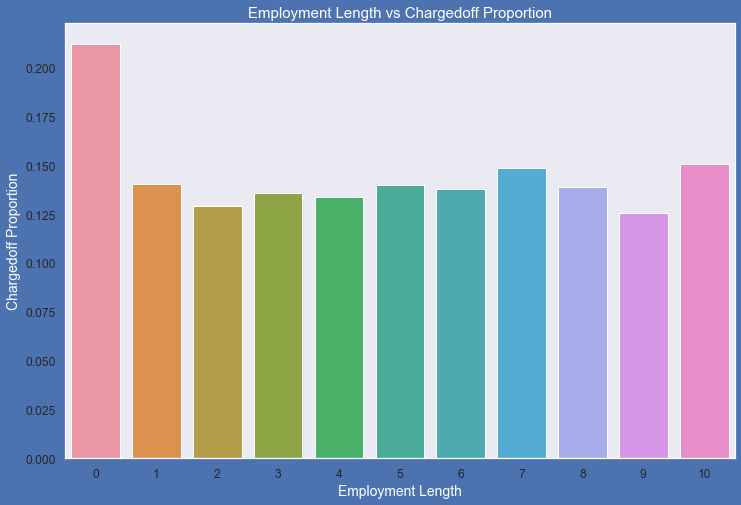

In [111]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=employment_length_vs_loan_status)
ax1.set_xlabel('Employment Length',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()



Observations:
- Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
- It makes sense as with less or no experience they don't have source of income to repay loan.
- Rest of the applicants have more or less same chnaces of getting charged off.

In [113]:
# Bivariate Analysis on address state against Chargedoff_Proportion

state_vs_loan_status = df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan_status['Total'] = state_vs_loan_status['Charged Off'] + state_vs_loan_status['Current'] + state_vs_loan_status['Fully Paid'] 
state_vs_loan_status['Chargedoff_Proportion'] = state_vs_loan_status['Charged Off'] / state_vs_loan_status['Total']
state_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)



loan_status addr_state  Charged Off  Current  Fully Paid   Total  \
28                  NE         3.00     0.00        2.00    5.00   
32                  NV       107.00    17.00      368.00  492.00   
40                  SD        12.00     2.00       50.00   64.00   
0                   AK        14.00     2.00       63.00   79.00   
9                   FL       497.00    85.00     2252.00 2834.00   
24                  MO       114.00    16.00      551.00  681.00   
13                  ID         1.00     0.00        5.00    6.00   
31                  NM        30.00     5.00      149.00  184.00   
11                  HI        28.00     8.00      138.00  174.00   
4                   CA      1116.00   149.00     5767.00 7032.00   
36                  OR        71.00    16.00      364.00  451.00   
43                  UT        40.00     6.00      211.00  257.00   
20                  MD       161.00    26.00      849.00 1036.00   
10                  GA       215.00    38.00     1135.00 1388.00   
46                  WA       127.00    22.00      684.00  833.00   
30                  NJ       277.00    59.00     1490.00 1826.00   
29                  NH        25.00     5.00      139.00  169.00   
27                  NC       114.00    38.00      629.00  781.00   
22                  MI       102.00    16.00      596.00  714.00   
39                  SC        66.00    13.00      389.00  468.00   
3                   AZ       121.00    30.00      718.00  869.00   
17                  KY        45.00    13.00      266.00  324.00   
47                  WI        63.00    20.00      376.00  459.00   
35                  OK        40.00    12.00      246.00  298.00   
23                  MN        81.00    10.00      522.00  613.00   
14                  IL       196.00    47.00     1262.00 1505.00   
33                  NY       488.00   111.00     3156.00 3755.00   
26                  MT        11.00     2.00       72.00   85.00   
38                  RI        25.00     4.00      165.00  194.00   
6                   CT        94.00    24.00      618.00  736.00   
44                  VA       176.00    38.00     1182.00 1396.00   
34                  OH       153.00    44.00     1020.00 1217.00   
5                   CO        97.00    26.00      659.00  782.00   
18                  LA        53.00     9.00      367.00  429.00   
1                   AL        54.00    17.00      378.00  449.00   
48                  WV        21.00     5.00      151.00  177.00   
19                  MA       156.00    42.00     1123.00 1321.00   
37                  PA       178.00    49.00     1281.00 1508.00   
41                  TN         2.00     0.00       15.00   17.00   
42                  TX       313.00    66.00     2315.00 2694.00   
16                  KS        31.00    16.00      224.00  271.00   
45                  VT         6.00     1.00       47.00   54.00   
2                   AR        27.00    10.00      208.00  245.00   
25                  MS         2.00     0.00       17.00   19.00   
8                   DE        12.00     1.00      101.00  114.00   
7                   DC        15.00     3.00      196.00  214.00   
49                  WY         4.00     3.00       76.00   83.00   
21                  ME         0.00     0.00        3.00    3.00   
15                  IN         0.00     0.00        9.00    9.00   
12                  IA         0.00     0.00        5.00    5.00   

loan_status  Chargedoff_Proportion  
28                            0.60  
32                            0.22  
40                            0.19  
0                             0.18  
9                             0.18  
24                            0.17  
13                            0.17  
31                            0.16  
11                            0.16  
4                             0.16  
36                            0.16  
43                            0.16  
20                            0.16  
10           

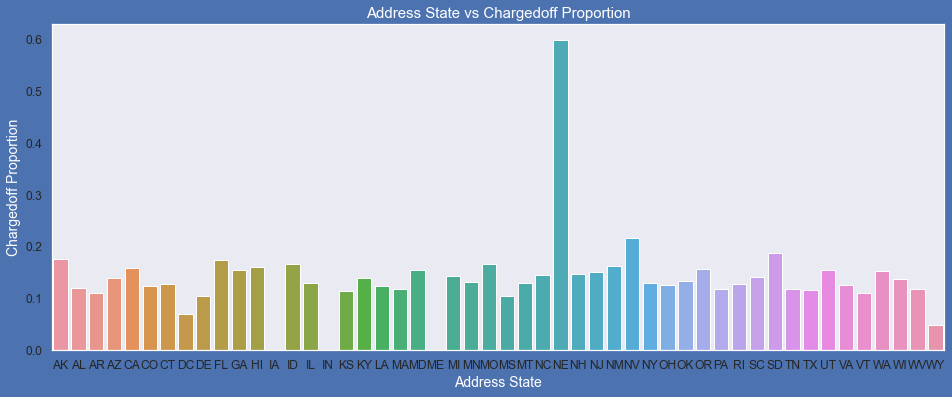

In [114]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(16, 6),facecolor='b')
ax1.set_title('Address State vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=state_vs_loan_status)
ax1.set_xlabel('Address State',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()



Observations:
- states NE has very high chances of charged off but number of applications are too low to make any decisions.
- NV,CA and FL states shows good number of charged offs in good number of applications.

In [115]:
# Bivariate Analysis on verification_status against Chargedoff_Proportion

verification_status_vs_loan_status = df.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verification_status_vs_loan_status['Total'] = verification_status_vs_loan_status['Charged Off'] + verification_status_vs_loan_status['Current'] + verification_status_vs_loan_status['Fully Paid'] 
verification_status_vs_loan_status['Chargedoff_Proportion'] = verification_status_vs_loan_status['Charged Off'] / verification_status_vs_loan_status['Total']
verification_status_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)



loan_status verification_status  Charged Off  Current  Fully Paid  Total  \
2                      Verified         2032      593       10000  12625   
1               Source Verified         1422      306        8135   9863   
0                  Not Verified         2130      227       14474  16831   

loan_status  Chargedoff_Proportion  
2                             0.16  
1                             0.14  
0                             0.13

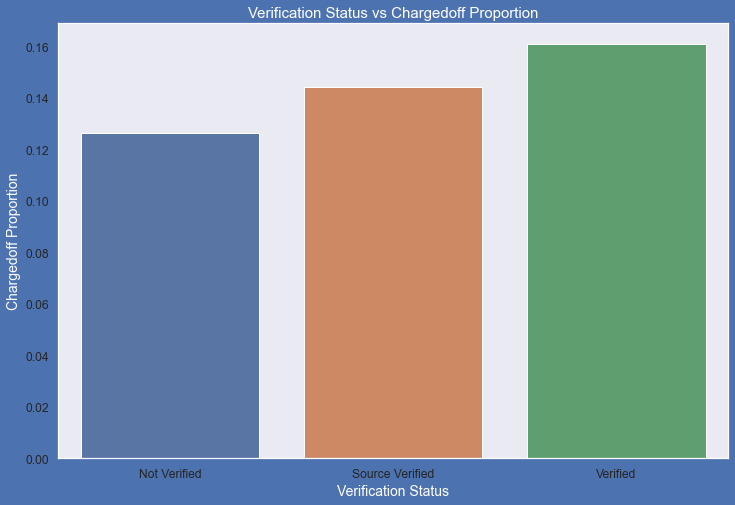

In [157]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verification_status_vs_loan_status)
ax1.set_xlabel('Verification Status',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()



Observations:
- There is not much difference in charged off proportion.
- This variable doesn't provide any insights for charged off.

In [119]:
# Bivariate Analysis on pub_rec_bankruptcies against Chargedoff_Proportion

pub_rec_bankruptcies_vs_loan_status = df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan_status['Total']=pub_rec_bankruptcies_vs_loan_status['Charged Off']+pub_rec_bankruptcies_vs_loan_status['Current']+pub_rec_bankruptcies_vs_loan_status['Fully Paid'] 
pub_rec_bankruptcies_vs_loan_status['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan_status['Charged Off'] / pub_rec_bankruptcies_vs_loan_status['Total']
pub_rec_bankruptcies_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)



loan_status  pub_rec_bankruptcies  Charged Off  Current  Fully Paid  Total  \
2                            2.00            2        2           3      7   
1                            1.00          365       37        1268   1670   
0                            0.00         5217     1087       31338  37642   

loan_status  Chargedoff_Proportion  
2                             0.29  
1                             0.22  
0                             0.14

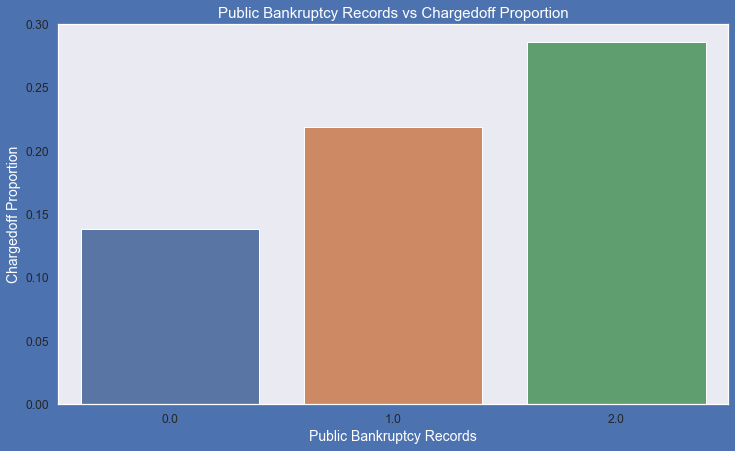

In [120]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='b')
ax1.set_title('Public Bankruptcy Records vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=pub_rec_bankruptcies_vs_loan_status)
ax1.set_xlabel('Public Bankruptcy Records',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()



Observations:
- Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
- pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
- Not known is the column for which we don't have any information abount borrower.
- This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

In [153]:
# Bivariate Analysis on Derogatory Public Record against Chargedoff_Proportion

bankruptcies_vs_loan_status = df.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan_status['Total']=bankruptcies_vs_loan_status['Charged Off']+bankruptcies_vs_loan_status['Current']+bankruptcies_vs_loan_status['Fully Paid'] 
bankruptcies_vs_loan_status['Chargedoff_Proportion'] = bankruptcies_vs_loan_status['Charged Off'] / bankruptcies_vs_loan_status['Total']
bankruptcies_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)



loan_status  pub_rec  Charged Off  Current  Fully Paid    Total  \
1                  1       454.00    43.00     1551.00  2048.00   
2                  2        10.00     3.00       37.00    50.00   
0                  0      5120.00  1080.00    31012.00 37212.00   
3                  3         0.00     0.00        7.00     7.00   
4                  4         0.00     0.00        2.00     2.00   

loan_status  Chargedoff_Proportion  
1                             0.22  
2                             0.20  
0                             0.14  
3                             0.00  
4                             0.00

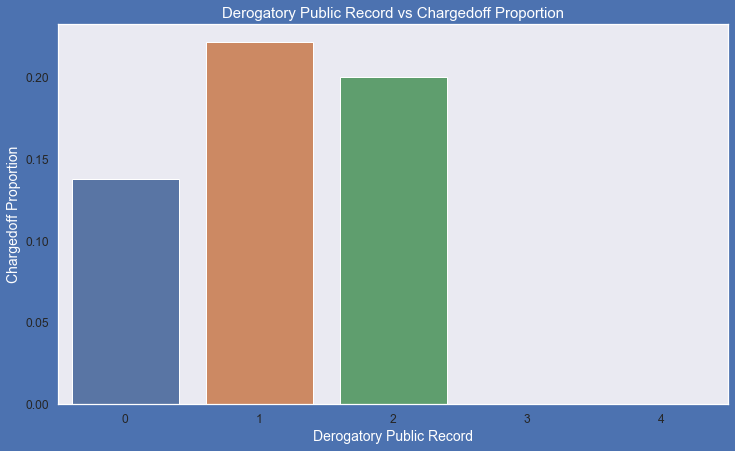

In [122]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='b')
ax1.set_title('Derogatory Public Record vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec', y='Chargedoff_Proportion', data=bankruptcies_vs_loan_status)
ax1.set_xlabel('Derogatory Public Record',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()



Observations:
- A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts your ability to qualify for credit or other services. Public records and collections are derogatory items because they reflect financial obligations that were not paid as agreed.
- Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
- pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

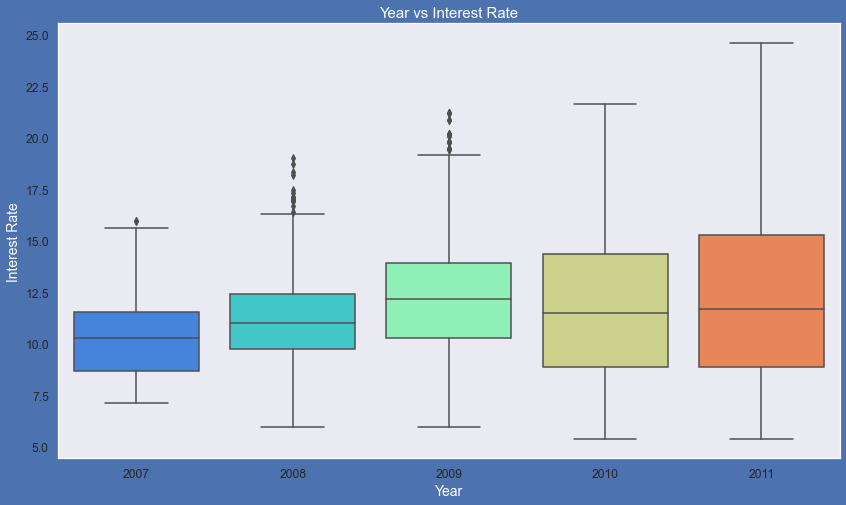

In [124]:
# Bivariate Analysis - year vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='year', data =df,palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Year',fontsize=14,color = 'w')
plt.show()



Observations:
- Plot shows intrest rate is increasing slowly with increase in year.

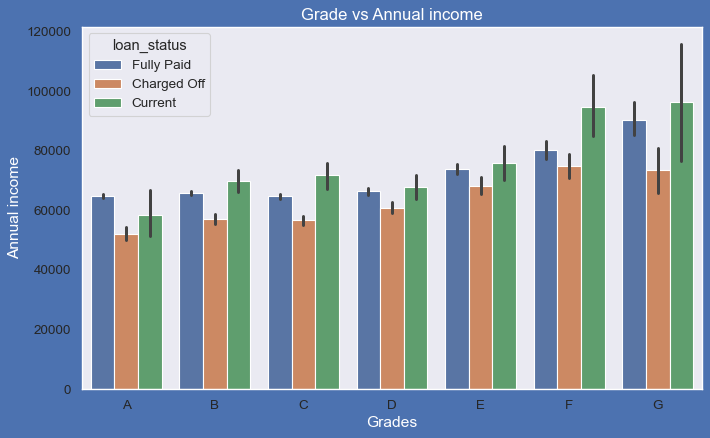

In [125]:
# Bivariate analysis
# BarPlot to show variation of annual income across grade for every loan status.

plt.figure(figsize=(10,6), dpi=80, facecolor='b', edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=df, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Grades',fontsize=14,color = 'w')
plt.show()



Observations:
- From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones 
- who'paid fully' for each and every grade (i.e. at same interest range)

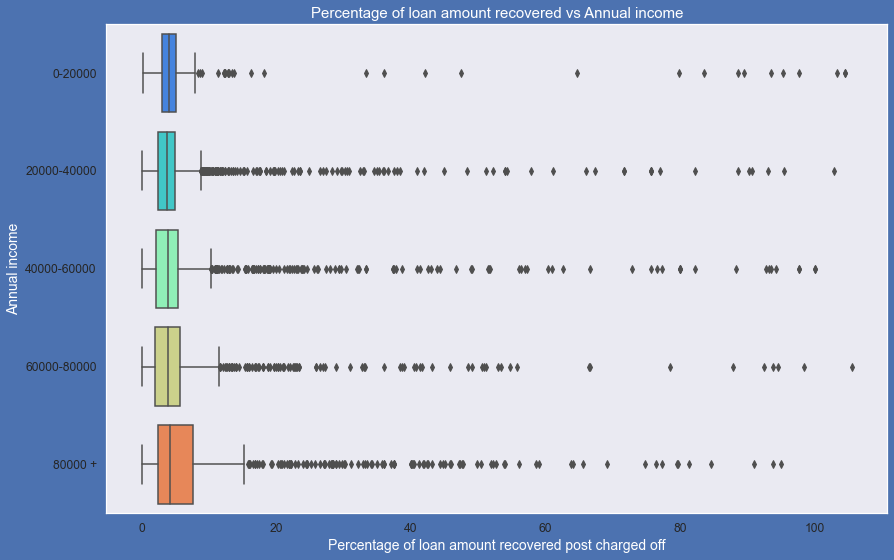

In [127]:
# Bivariate Analysis - Recoveries vs Annual income
# Box Plot
df['recoveries']=pd.to_numeric(df['recoveries'],errors='coerce')
loan_df_rec=df[df['recoveries'] > 0.00]

# calculate recovery percentage 
loan_df_rec['recovery_prcnt']=((loan_df_rec['recoveries']/loan_df_rec['loan_amnt']) * 100) 

# plot
plt.figure(figsize=(14,9),facecolor='b')
ax=sns.boxplot(x='recovery_prcnt',y='annual_inc_cats',data=loan_df_rec,palette='rainbow')
ax.set_title('Percentage of loan amount recovered vs Annual income',fontsize=15,color = 'w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Percentage of loan amount recovered post charged off',fontsize=14,color = 'w')
plt.show()



Observations:
- Higher percentage of loan amount is recovered when annual income is high.
- Plot shows no significant variation but there is slight increase in recovery percentage with increase in annual income.

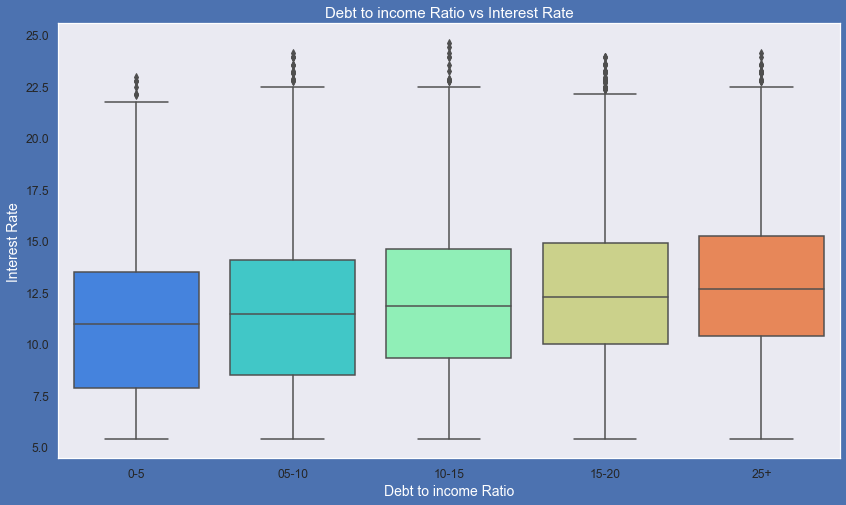

In [128]:
# Bivariate Analysis - dti vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='dti_cats', data =df,palette='rainbow')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'w')
plt.show()



Observations:
- If your DTI is low enough you may get a lower interest rate.
- Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.

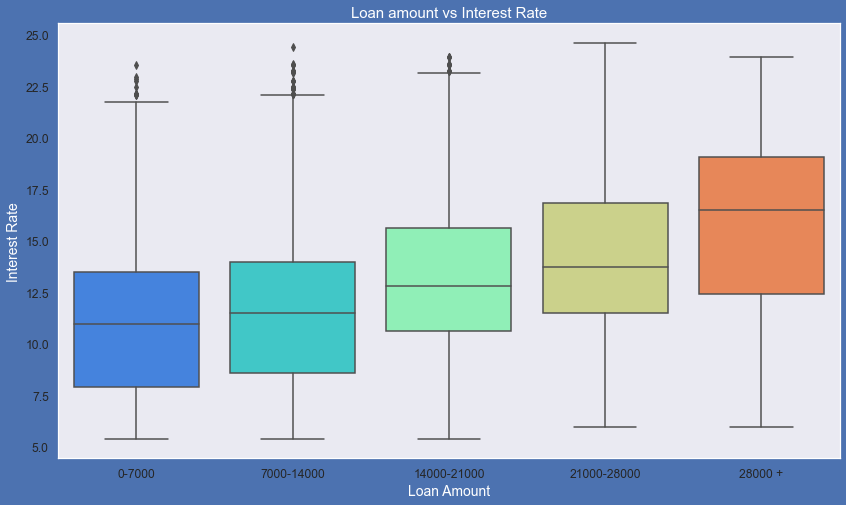

In [129]:
# Bivariate Analysis - Loan Amount vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='loan_amnt_cats', data =df,palette='rainbow')
ax.set_title('Loan amount vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()



Observations:
- It is clear that intrest rate is increasing with loan amount increase.
- probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the interest rate.

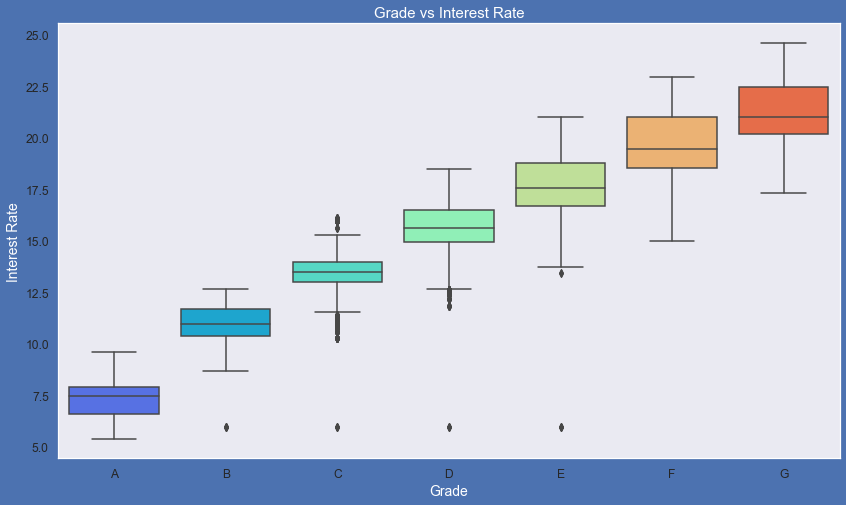

In [133]:
# Bivariate Analysis - Grade vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='grade', data =df,palette='rainbow',order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Grade',fontsize=14,color = 'w')
plt.show()



Observations:
- A-grade is a top letter grade for a lender to assign to a borrower.
- The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.
- It is clear that intrest rate is increasing with grades moving from A to F.

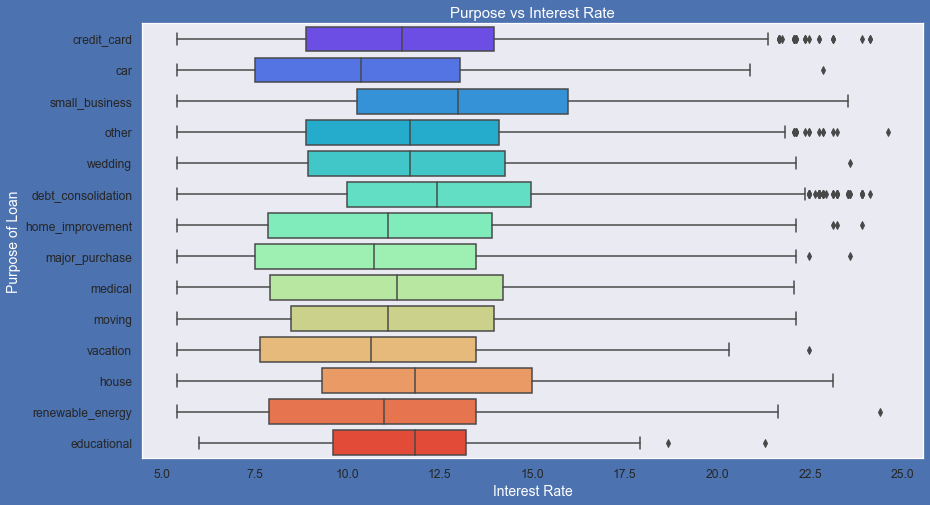

In [134]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(x='int_rate', y='purpose', data =df,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.show()



Observations:
- It is clear that avearge intrest rate is highest for small business purpose.
- Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.
- Debt consolidation is 2nd where borrowers had to pay more interest rate.

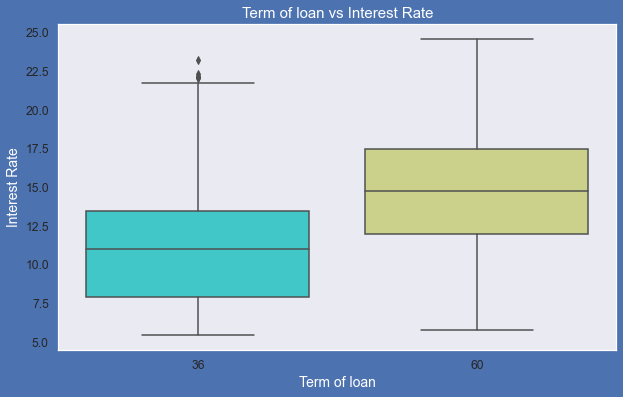

In [135]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.boxplot(y='int_rate', x='term', data =df,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()



Observations:
- It is clear that avearge intrest rate is higher for 60 months loan term.
- Most of the loans issued for longer term had higher intrest rates for repayement.

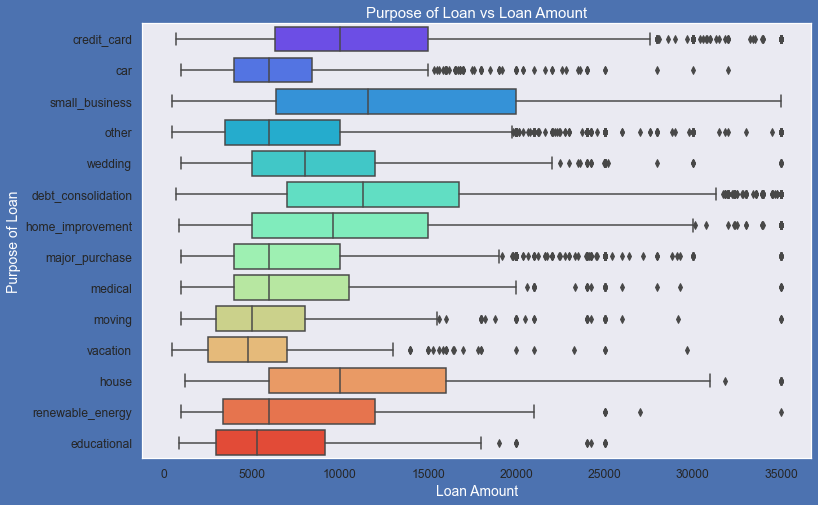

In [136]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# Box Plot

plt.figure(figsize=(12,8),facecolor='b')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =df,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()



Observations:
- Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
- Debt consolidation is second and Credit card comes 3rd.

#### Multivariate Analysis

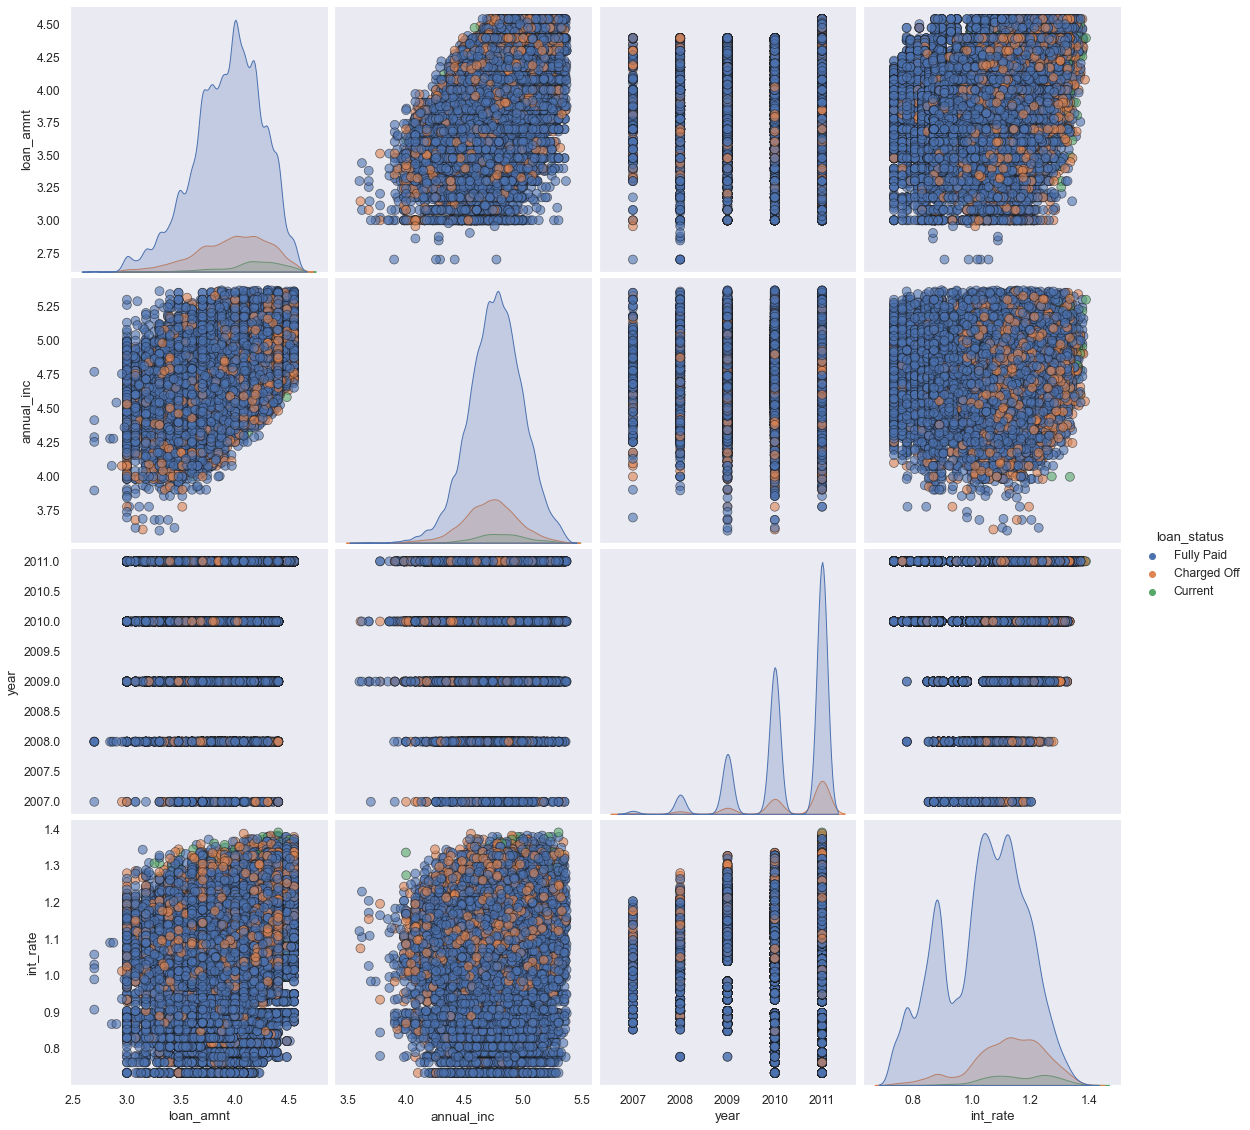

In [138]:
# Lets draw a pair plot for multivariate analysis
# Pick few imporatnt columns from dataset separately.

loan_pair = df[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status']].copy()
loan_pair.head()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

Observation:
- Higher the intrest rate higher charged off ratio
- Higher the annual income higher the loan amount slightly.
- increase in number of charged off with increase in year.
- intrest rate is increasing with loan amount increase

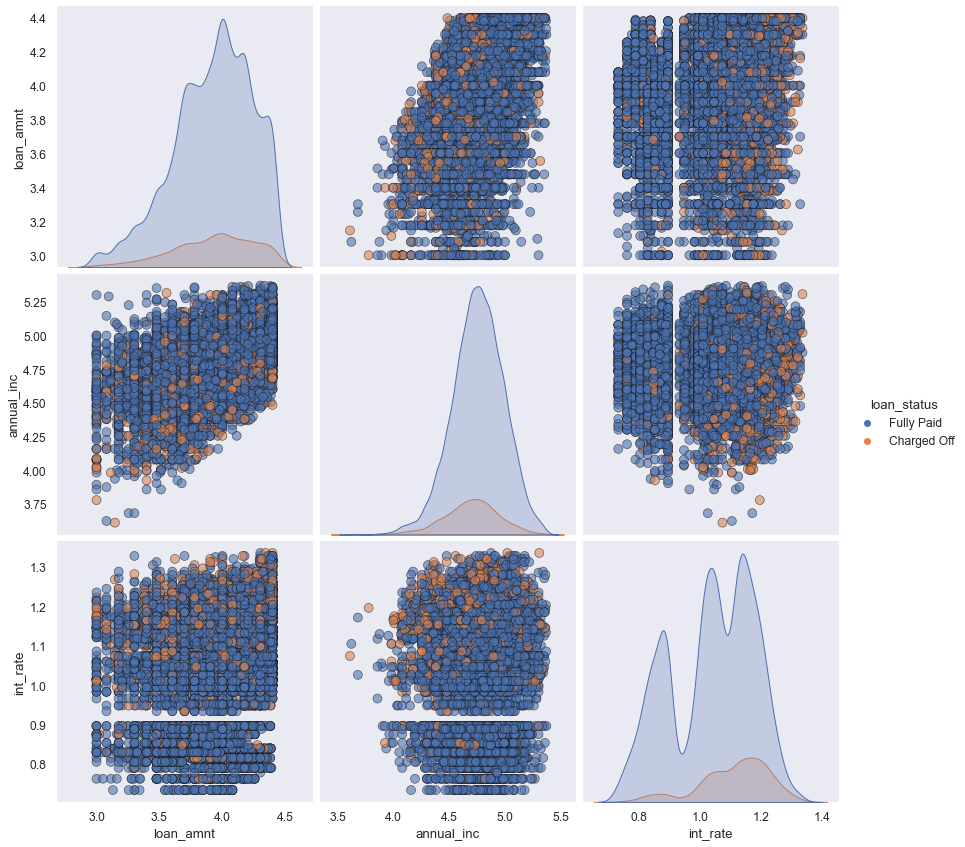

In [139]:
# Draw a pair plot for multivariate analysis
# Pick few imporatnt columns from dataset separately.
# Above plot is too dense so just pick year 2010 for getting some insights.

sns.pairplot(loan_pair[loan_pair['year'] == 2010], 
             vars = ['loan_amnt', 'annual_inc', 'int_rate'], 
             hue = 'loan_status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);



Observation:
- Higher the intrest rate higher charged off ratio
- Higher the annual income higher the loan amount slightly
- Intrest rate is increasing with loan amount increase this results in high charged off.